<a href="https://colab.research.google.com/github/NguyenHoang127/AI_Exercise_All/blob/main/Project_AI_1_10_VietNamese_Dishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import drive 
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [53]:
#Khai báo thư viện

#1.Thư viện tính toán và hiển thị 
import matplotlib.pyplot as plt
import numpy as np

#2.Thư viện xử lý hình 3 chiều thành dữ liệu dưới dạng số
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import to_categorical


In [54]:
folder = '/content/gdrive/MyDrive/AI_Data_Homework_1/Project_1_VietNamese_Dishes'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('Banhcanh '):
    output= 1.0
  if file.startswith('Banhchung '):
    output= 2.0
  if file.startswith('Banhmi '):
    output= 3.0
  if file.startswith('Banhxeo '):
    output= 4.0
  if file.startswith('Bunbohue '):
    output= 5.0
  if file.startswith('Chaolong '):
    output= 6.0
  if file.startswith('Comtam '):
    output= 7.0
  if file.startswith('Goicuon '):
    output= 8.0
  if file.startswith('Hutieu '):
    output= 9.0
  if file.startswith('Miquang '):
    output= 10.0

  photo = load_img(folder + '/' + file, target_size= (200,200))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)

save('/content/gdrive/MyDrive/AI_Digital_Data/Project_1_VietNamese_Food/food_photos.npy', photos)
save('/content/gdrive/MyDrive/AI_Digital_Data/Project_1_VietNamese_Food/food_labels.npy', labels)

(2112, 200, 200, 3) (2112,)


In [55]:
# Khởi tạo và sử dụng dữ liệu đã tạo
photos = np.load('/content/gdrive/MyDrive/AI_Digital_Data/Project_1_VietNamese_Food/food_photos.npy')
labels = np.load('/content/gdrive/MyDrive/AI_Digital_Data/Project_1_VietNamese_Food/food_labels.npy')

# Preprocess data
photos = photos.astype('float32') / 255.0
labels = to_categorical(labels)

# Preprocess data
photos = photos.astype('float32') / 255.0
labels = to_categorical(labels)


# Chia ra thành 2 phần để test và train

test_x, test_y = photos[:25], labels[:25]
train_x, train_y = photos[25:], labels[25:]

In [56]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization
from keras.layers.activation import LeakyReLU
from keras.optimizers import Adam
from keras import losses
from keras.losses import categorical_crossentropy


In [59]:
# Tạo ra mô hình mạng CNN để train

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(11, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 23, 23, 128)     

In [66]:
#Biên dịch chương trình
from keras.backend import categorical_crossentropy
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(train_x)

# Train model
history = model.fit(datagen.flow(train_x, train_y, batch_size=63), epochs=45, validation_data=(test_x, test_y))

# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)



Epoch 1/45
34/34 [==============================] - 89s 3s/step - loss: 0.3808 - accuracy: 0.8711 - val_loss: 1.1093 - val_accuracy: 0.7600
Epoch 2/45
34/34 [==============================] - 19s 538ms/step - loss: 0.2986 - accuracy: 0.8984 - val_loss: 1.2791 - val_accuracy: 0.7600
Epoch 3/45
34/34 [==============================] - 18s 531ms/step - loss: 0.2873 - accuracy: 0.8989 - val_loss: 1.3936 - val_accuracy: 0.7200
Epoch 4/45
34/34 [==============================] - 21s 605ms/step - loss: 0.3324 - accuracy: 0.8898 - val_loss: 0.5463 - val_accuracy: 0.8400
Epoch 5/45
34/34 [==============================] - 19s 570ms/step - loss: 0.2940 - accuracy: 0.8960 - val_loss: 1.4284 - val_accuracy: 0.8000
Epoch 6/45
34/34 [==============================] - 18s 526ms/step - loss: 0.2996 - accuracy: 0.9023 - val_loss: 1.5645 - val_accuracy: 0.6800
Epoch 7/45
34/34 [==============================] - 19s 568ms/step - loss: 0.3006 - accuracy: 0.8927 - val_loss: 1.0091 - val_accuracy: 0.8800
Ep

Test loss: 0.7854042649269104
Test accunacy 0.800000011920929


Text(0.5, 1.0, 'Training & Testing Accuracy')

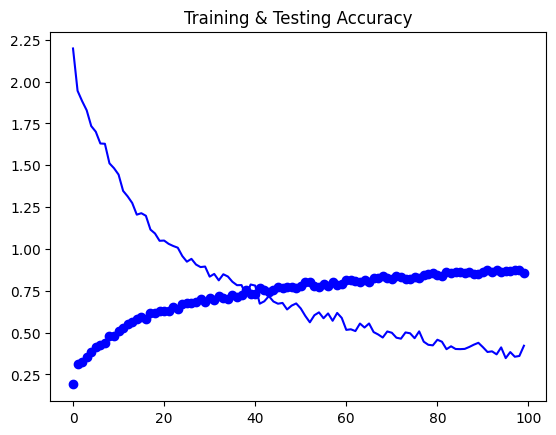

In [61]:
import matplotlib.pyplot as plt

eval = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', eval[0])
print('Test accunacy', eval[1])

accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning Accuracy')
plt.plot(epochs, loss, 'b', label= 'Test Accuracy')
plt.title('Training & Testing Accuracy')

In [62]:
model.save('/content/gdrive/MyDrive/AI_Result_Homework_1/P1_VietNamese_food/food.h5')

1/1 [==============================] - 0s 22ms/step
BANH CHUNG


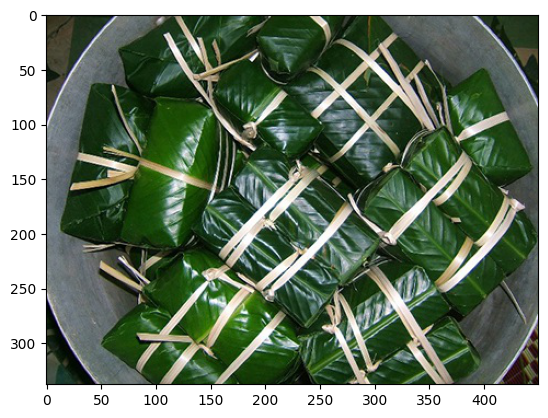

1/1 [==============================] - 0s 26ms/step
BANH CHUNG


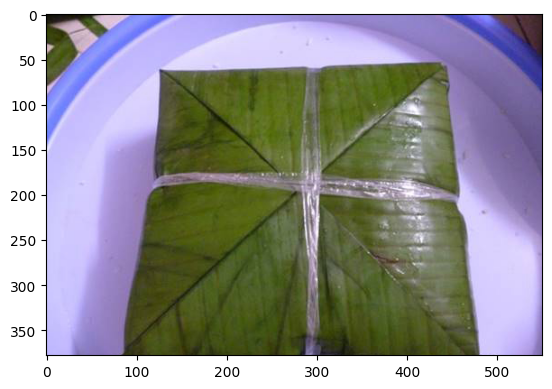

1/1 [==============================] - 0s 20ms/step
BANH MI


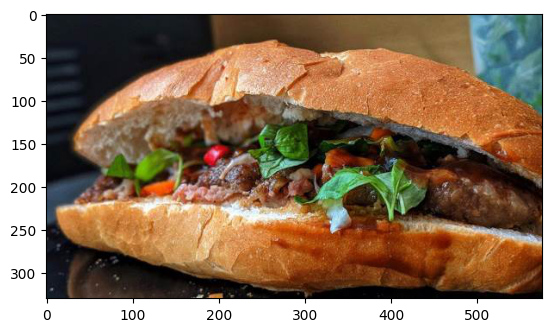

1/1 [==============================] - 0s 25ms/step
BANH XEO


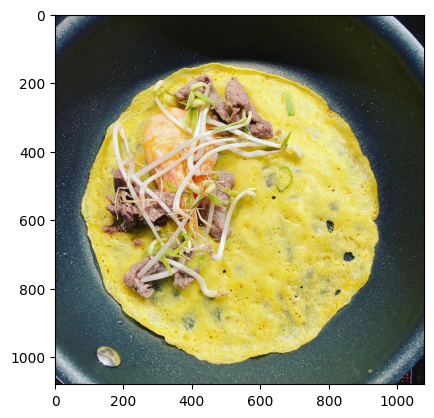

1/1 [==============================] - 0s 20ms/step
COM TAM


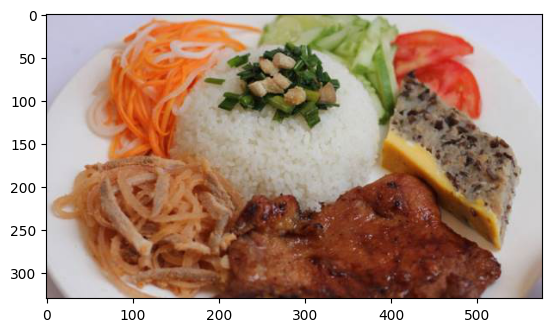

1/1 [==============================] - 0s 23ms/step
GOI CUON


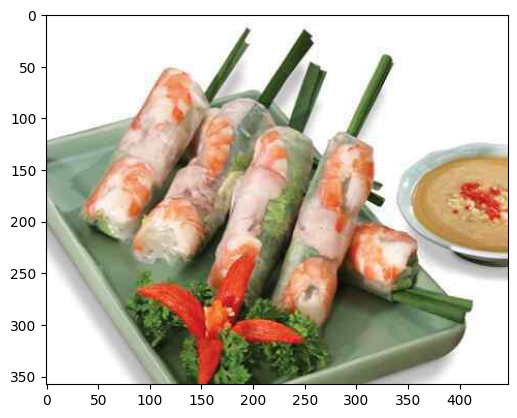

1/1 [==============================] - 0s 27ms/step
BANH CANH


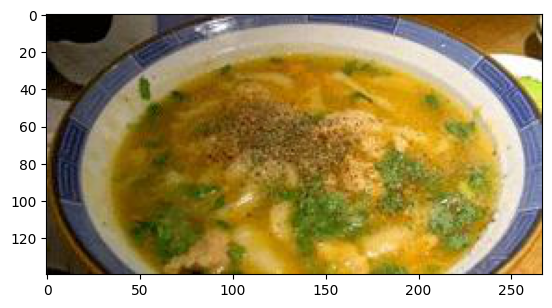

In [65]:
#Testing
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

folder = '/content/gdrive/MyDrive/AI_Testing/P1'
for file in listdir(folder):
  photo = load_img(folder + '/' +  file)
  plt.imshow(photo)
  photo = load_img(folder + '/' +  file, target_size = (200, 200))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  
  class_name=[' ','BANH CANH','BANH CHUNG','BANH MI', 'BANH XEO', 'BUN BO HUE', 'CHAO LONG', 'COM TAM', 'GOI CUON','HU TIEU','MI QUANG']
  print(class_name[result])
  plt.show()